In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Data import

In [71]:
df = pd.read_csv('HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


# Data cleaning

In [72]:
df.isnull()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
397,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
398,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
399,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


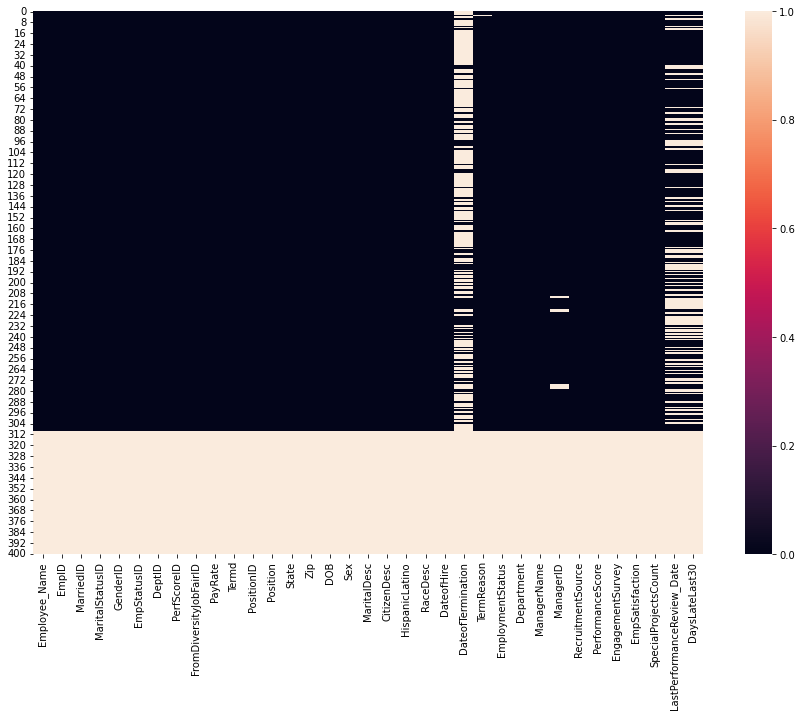

In [73]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())
plt.show()

In [74]:
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)

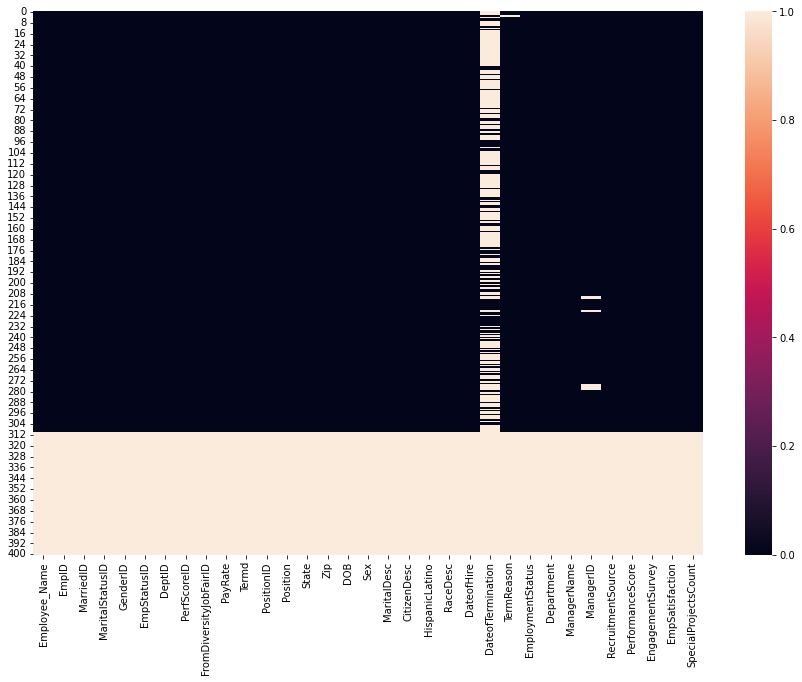

In [75]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())
plt.show()

In [76]:
df.dropna(thresh=2,inplace=True)

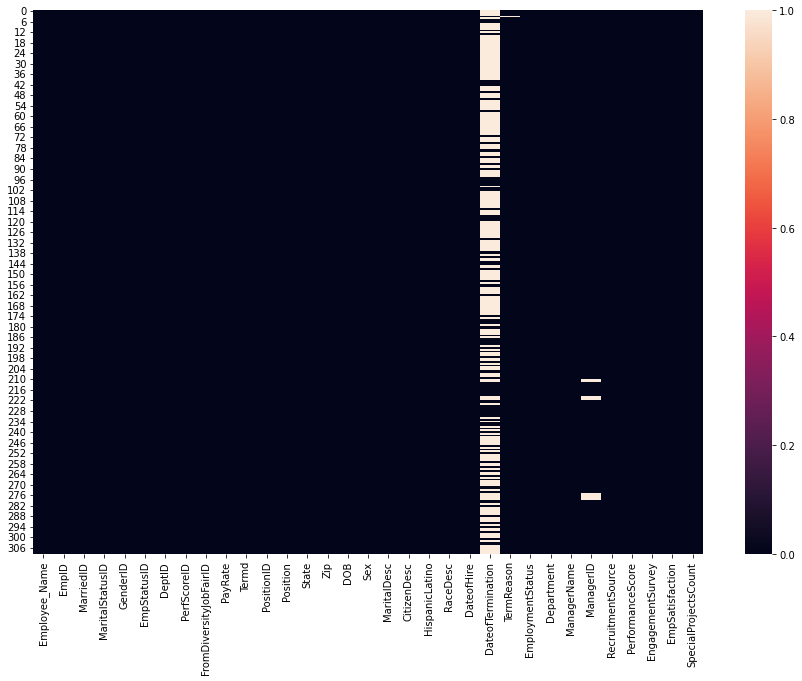

In [77]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())
plt.show()

In [78]:
df[['DateofTermination','DOB','DateofHire']].dtypes # datetime to check

DateofTermination    object
DOB                  object
DateofHire           object
dtype: object

In [79]:
df[['DateofTermination','DOB','DateofHire']].sample(5)

,DateofTermination,DOB,DateofHire
236,09/26/11,11/25/78,8/30/2010
165,NaN,05/31/88,10/3/2011
69,NaN,04/04/79,2/16/2015
273,NaN,12/01/74,5/13/2013
246,NaN,11/23/85,11/10/2014


In [132]:
df['DOB'] = pd.to_datetime(df['DOB'], format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')

In [133]:
df[['DateofTermination','DOB','DateofHire']].sample(5)

,DateofTermination,DOB,DateofHire
218,2014-04-04,1989-05-02,2011-09-26
253,NaT,1979-03-19,2013-07-08
158,NaT,1976-12-11,2013-09-30
39,NaT,1972-11-21,2017-01-07
54,NaT,2066-03-17,2014-05-05


# Data analysis

In [13]:
sns.set_style('darkgrid') # whitegrid, dark, white, ticks, darkgrid

In [14]:
# (df[df['ManagerName']=='Michael Albert'][df['PerformanceScore']=='Exceeds'][['ManagerName','PerformanceScore']]).count()

In [52]:
ps = df[['ManagerName','PerformanceScore', 'Employee_Name']].groupby(['ManagerName','PerformanceScore']).agg({'PerformanceScore':'count'})
ps.rename(columns={'PerformanceScore':'PerformanceScoreN'}, inplace=True)
ps.reset_index(inplace=True)
ps

,ManagerName,PerformanceScore,PerformanceScoreN
0,Alex Sweetwater,Exceeds,2
1,Alex Sweetwater,Fully Meets,6
2,Alex Sweetwater,Needs Improvement,1
3,Amy Dunn,Exceeds,3
4,Amy Dunn,Fully Meets,15
5,Amy Dunn,Needs Improvement,1
6,Amy Dunn,PIP,2
7,Board of Directors,Fully Meets,2
8,Brandon R. LeBlanc,Fully Meets,7
9,Brannon Miller,Exceeds,7


In [53]:
Enum = df[['ManagerName','Employee_Name']].groupby(['ManagerName']).agg({'Employee_Name':'count'})
Enum

,Employee_Name
ManagerName,
Alex Sweetwater,9
Amy Dunn,21
Board of Directors,2
Brandon R. LeBlanc,7
Brannon Miller,21
Brian Champaigne,8
David Stanley,21
Debra Houlihan,3
Elijiah Gray,22


In [67]:
ps_Enum = pd.merge(ps,Enum,how='outer',on='ManagerName')
ps_Enum['PS/EN'] = (ps_Enum['PerformanceScoreN']/ps_Enum['Employee_Name'])*100
#ps_Enum.sort_values(by='PS/EN',ascending=False)

In [68]:
#plt.figure(figsize=(20,15))
#sns.heatmap(df.pivot_table(index=df['PerformanceScore'],columns=df['ManagerName'],values='PerformanceScore',aggfunc='count').fillna(0))
#plt.show()

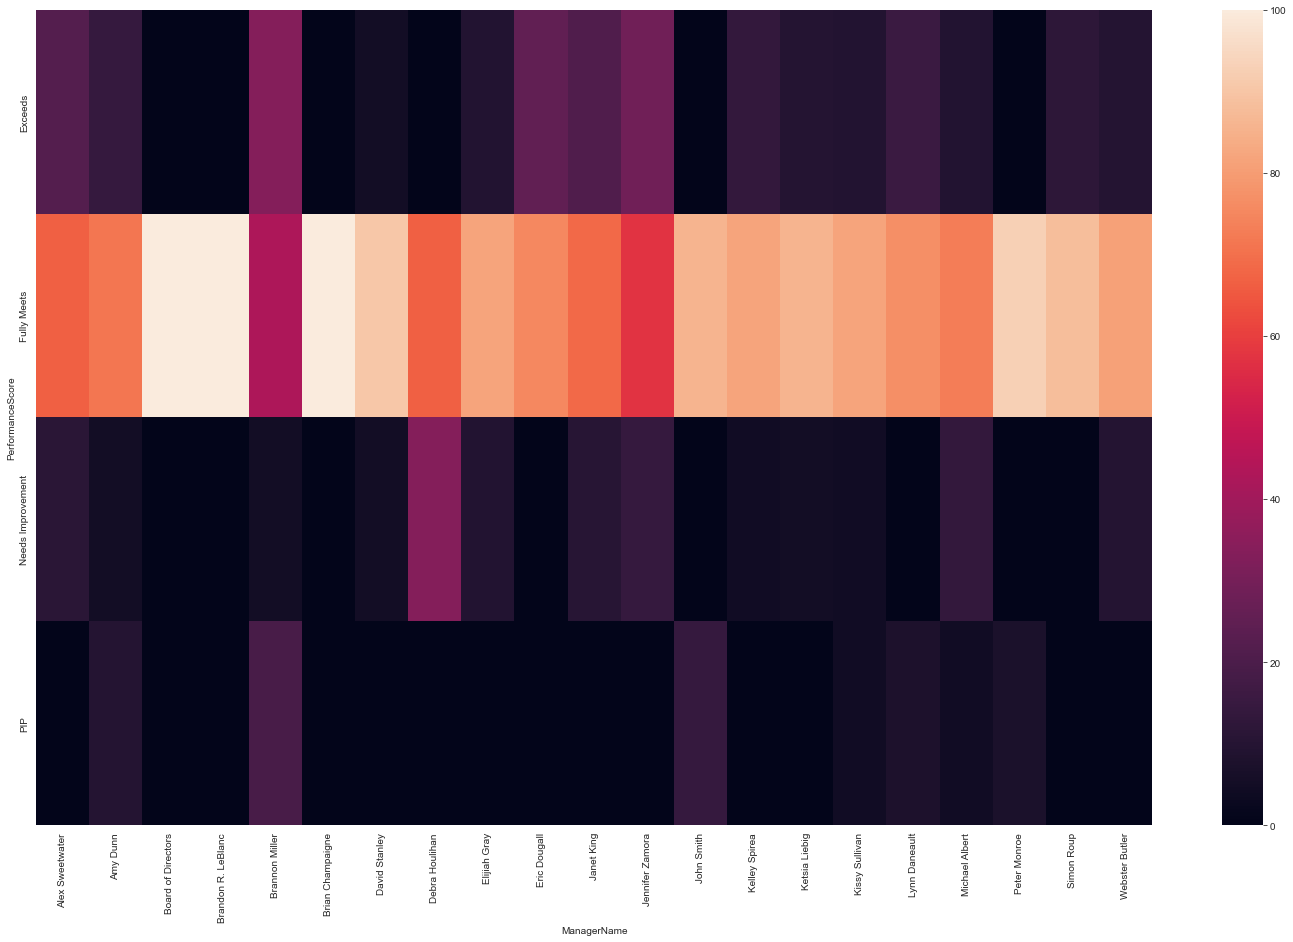

In [63]:
plt.figure(figsize=(25,15))
sns.heatmap(ps_Enum.pivot_table(index=ps_Enum['PerformanceScore'],columns=ps_Enum['ManagerName'],values='PS/EN').fillna(0))
plt.show()

In [69]:
# Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)? - Nie ma zależności.

# Liczymy staż pracy:

In [154]:
def count_seniority(row):
    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']
    return (end_date - row['DateofHire'])/np.timedelta64(1,'Y')

In [155]:
df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)

In [33]:
df[['DateofHire','DateofTermination','Seniority']].head() # df[['Recruitment Source','Seniority']].head()

,DateofHire,DateofTermination,Seniority
0,2008-10-27,NaT,10.916035
1,2014-01-06,NaT,5.722226
2,2014-09-29,NaT,4.993942
3,2015-02-16,2015-04-15,0.158799
4,2015-05-01,NaT,4.408030


In [34]:
df[['RecruitmentSource','Seniority']].describe()

,Seniority
count,310.000000
mean,4.773453
std,2.638740
min,0.005476
25%,3.000746
50%,4.992573
75%,6.220525
max,13.714176


In [35]:
df[['RecruitmentSource','Seniority']].groupby(['RecruitmentSource']).agg({'RecruitmentSource': 'count','Seniority':'mean'}).sort_values(by='Seniority',ascending=False)

,RecruitmentSource,Seniority
RecruitmentSource,,
Careerbuilder,1,8.482036
Other,9,6.453247
Billboard,16,5.862886
MBTA ads,17,5.729634
Website Banner Ads,13,5.721594
Information Session,4,5.623661
Professional Society,20,5.437757
Employee Referral,31,5.026002
Pay Per Click - Google,21,5.009457


In [36]:
#plt.figure(figsize=(30,5))
#sns.barplot(x='RecruitmentSource',y='Seniority',data=df)
#plt.show()

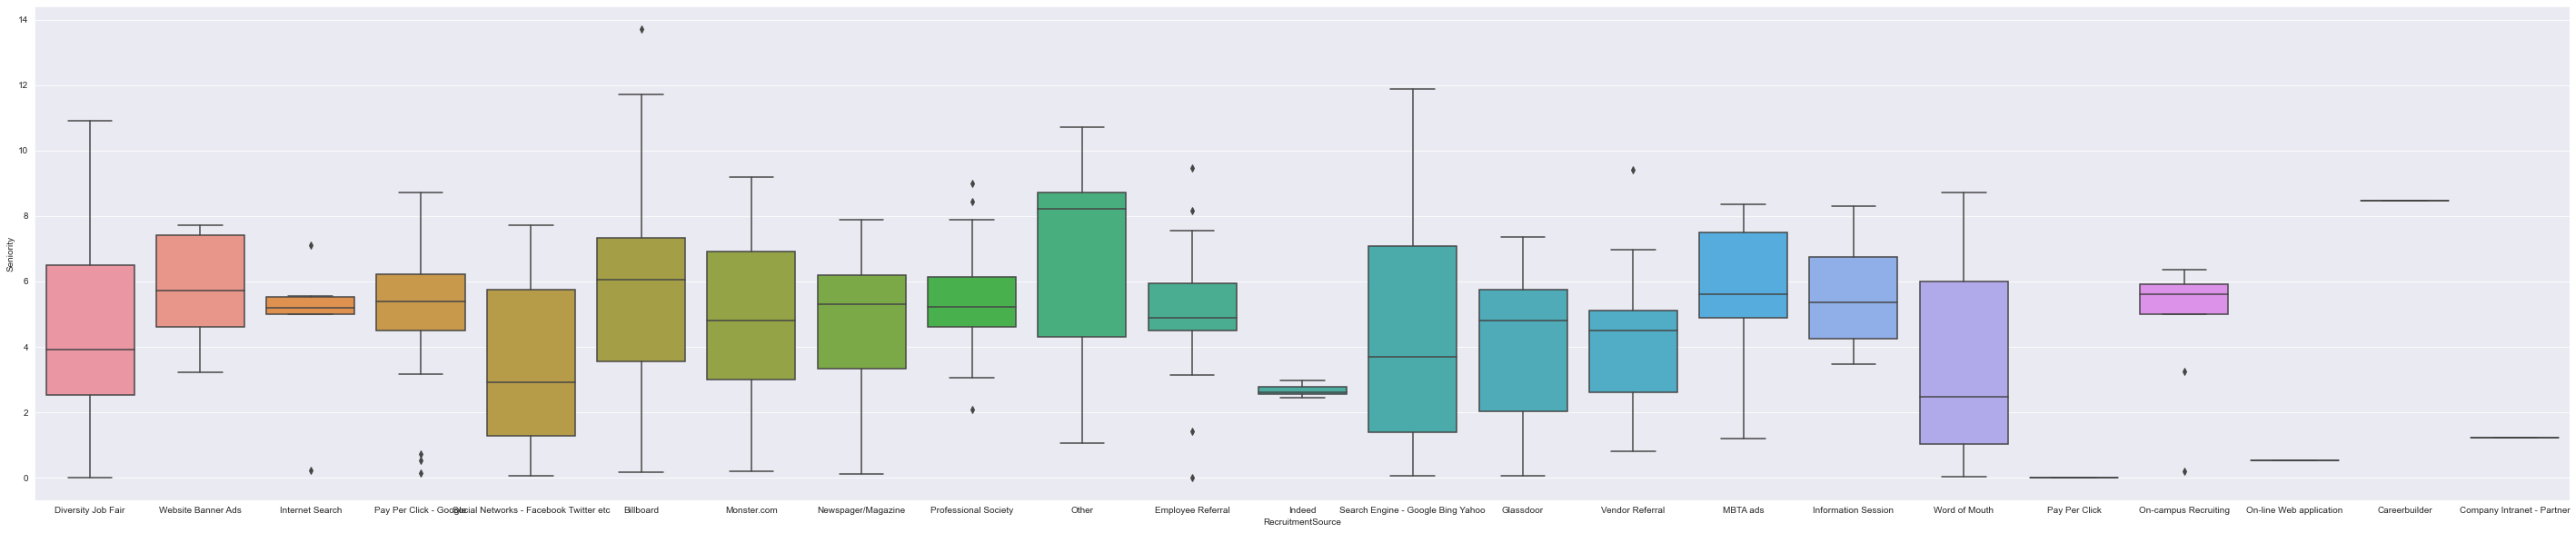

In [37]:
plt.figure(figsize=(50,10))
sns.boxplot(x='RecruitmentSource',y='Seniority', data=df)
plt.show()

In [98]:
# Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników? - Other, Billboard. 

In [38]:
df[['MaritalDesc','EmpSatisfaction']].groupby(['MaritalDesc','EmpSatisfaction']).agg({'EmpSatisfaction': 'count'})

EmpSatisfaction
MaritalDesc EmpSatisfaction                 
Divorced    2.0                            1
            3.0                            6
            4.0                           14
            5.0                            9
Married     2.0                            5
            3.0                           54
            4.0                           31
            5.0                           33
Separated   1.0                            1
            3.0                            4
            4.0                            2
            5.0                            5
Single      1.0                            1
            2.0                            3
            3.0                           44
            4.0                           40
            5.0                           49
Widowed     4.0                            6
            5.0                            2

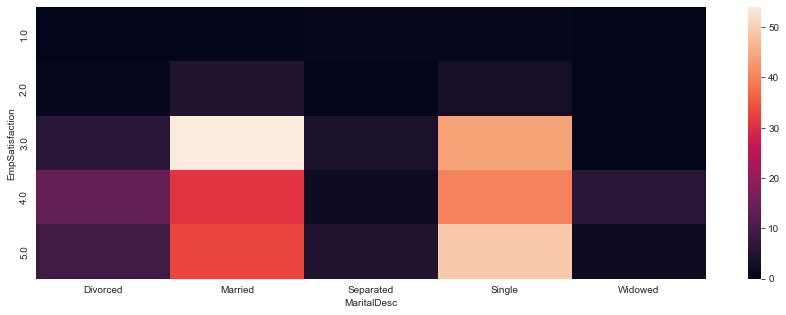

In [29]:
plt.figure(figsize=(15,5))
sns.heatmap(df.pivot_table(index=df['EmpSatisfaction'],columns=df['MaritalDesc'],values='EmpSatisfaction',aggfunc='count').fillna(0))
plt.show()

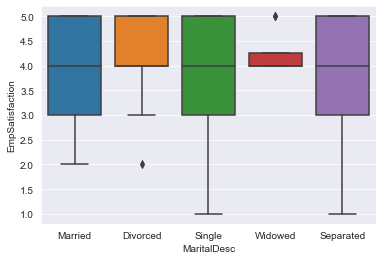

In [27]:
sns.boxplot(x='MaritalDesc',y='EmpSatisfaction', data=df)
plt.show()

In [30]:
#Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?
# Ma wpływ, owodowiali i rozwiedzeni wyżej oceniają zadowolenie z pracy niż reszta

In [156]:
def count_age(row):
    end_date = dt.datetime(2019,9,27)
    if row['DOB'] > end_date:
        return ((end_date - (row['DOB'] - np.timedelta64(100,'Y')))//np.timedelta64(1,'Y'))
    else:
        return (end_date - row['DOB'])/np.timedelta64(1,'Y')

In [157]:
df['Age'] = df.apply(lambda row: count_age(row),axis=1)

In [137]:
df[['DOB','Age']].sample(5)

,DOB,Age
150,1977-03-31,42.492317
257,1983-11-08,35.885747
244,1984-03-11,35.546247
56,1973-04-05,46.478709
222,1975-04-03,44.485513


In [140]:
df[['DOB','Age']].describe()

,Age
count,310.000000
mean,40.603151
std,8.764786
min,27.110755
25%,33.362081
50%,39.038447
75%,45.822981
max,68.000000


In [139]:
df['DOB'][df['DOB']> '2019-09-27'].count()

42

In [141]:
df[['DOB','Age']][df['DOB']> '2019-09-27']

,DOB,Age
6,2064-06-01,55.0
7,2063-05-15,56.0
12,2054-10-12,64.0
22,2063-08-28,56.0
31,2068-01-15,51.0
32,2065-05-07,54.0
54,2066-03-17,53.0
57,2064-01-04,55.0
61,2068-07-06,51.0
73,2054-09-21,65.0


C:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


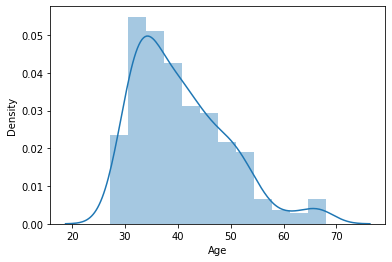

In [158]:
sns.distplot(df['Age']) # - histogram (rozkład). Wykres liniowy - estymator jądrowy gęstości (kernel density plot).FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms). warnings.warn(msg, FutureWarning)
plt.show()

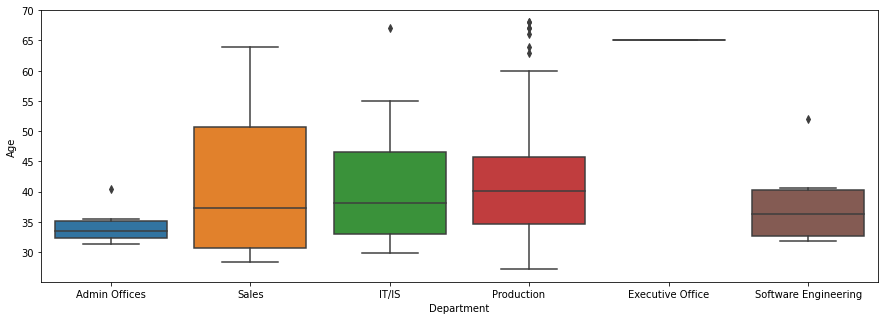

In [159]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Department',y='Age', data=df)
plt.show()

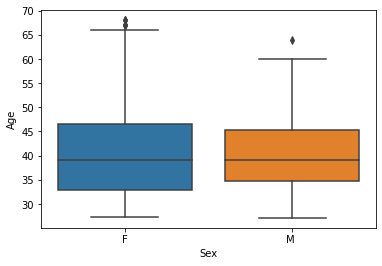

In [160]:
#plt.figure(figsize=(15,5))
sns.boxplot(x='Sex',y='Age', data=df)
plt.show()

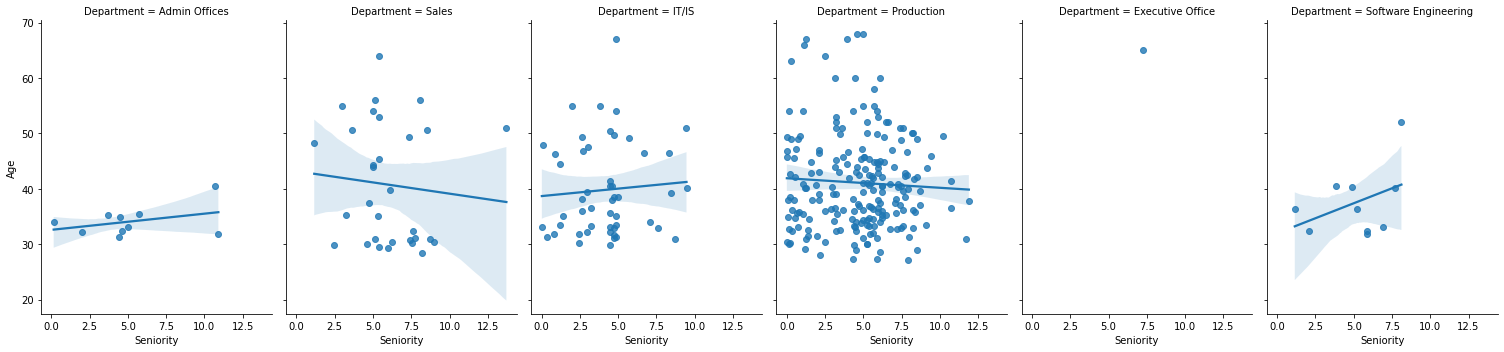

In [164]:
sns.lmplot(x='Seniority',y='Age',data=df,col='Department', aspect=0.7)
plt.show()

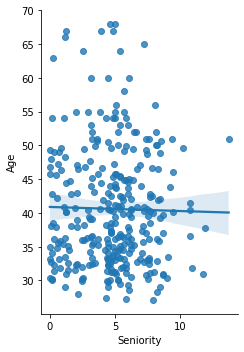

In [165]:
sns.lmplot(x='Seniority',y='Age',data=df,aspect=0.7)
plt.show()

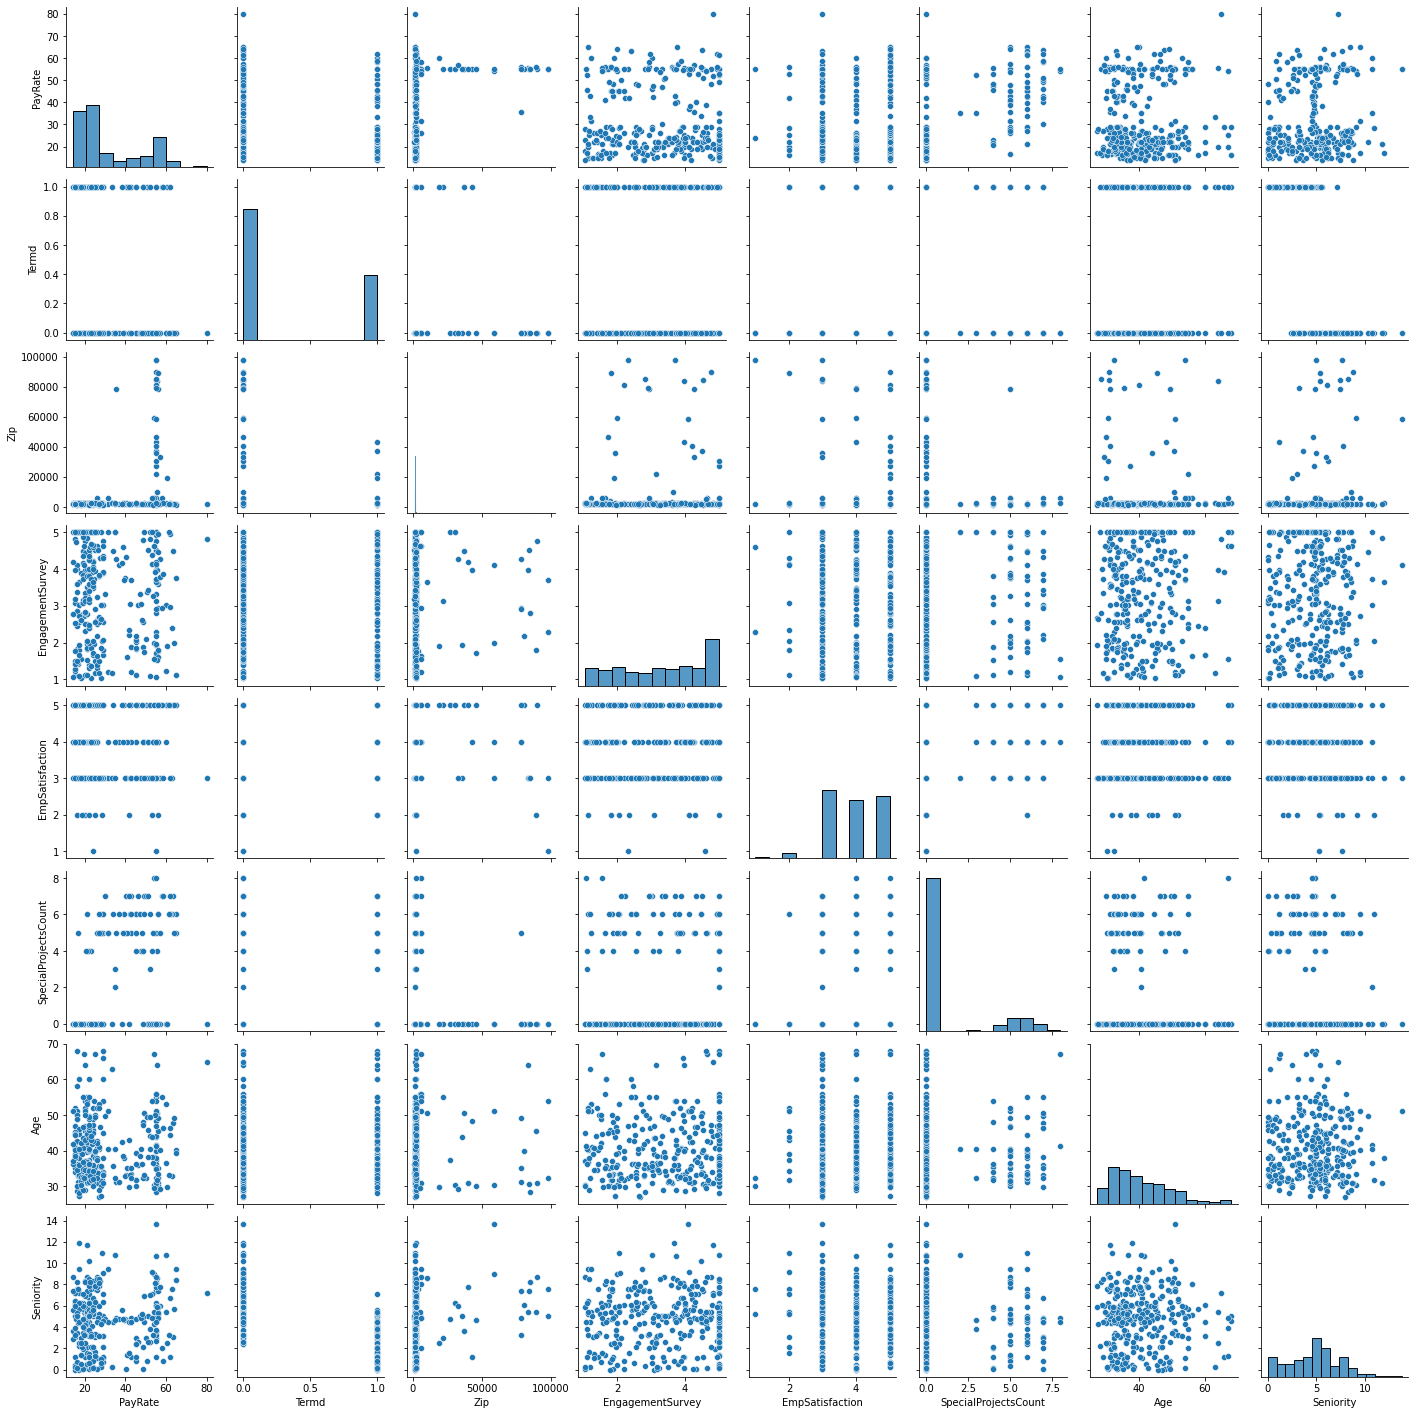

In [166]:
sns.pairplot(df[df.columns[~df.columns.str.endswith('ID')]].select_dtypes(float))

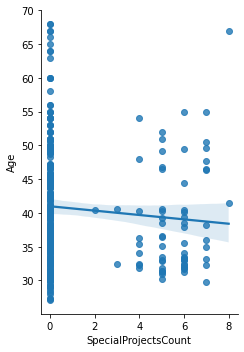

In [167]:
sns.lmplot(x='SpecialProjectsCount',y='Age',data=df,aspect=0.7)
plt.show()

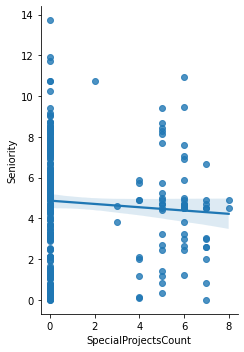

In [168]:
sns.lmplot(x='SpecialProjectsCount',y='Seniority',data=df,aspect=0.7)
plt.show()